In [1]:
import datacube
import numpy as np
import xarray as xr
import rasterio as rio
import geopandas as gpd
import rasterio.features
import matplotlib.pyplot as plt
from rasterio.features import geometry_mask

from datacube.utils import geometry 


In [2]:
dc = datacube.Datacube(app="knu_geoinformatics_gtopo_30as")

In [3]:
# ua_oblasts_shp.zip file has to be unzipped 
path_to_shp = './data/ua_oblasts.shp'

#### 3.3.1 Зчитати шейпфайл (.shp)

In [4]:
gdf = 

#### 3.3.2 Зміна координатної системи (CRS) з географічної (EPSG:4326) на прямокутну (EPSG:32636)

In [5]:
gdf = 

<Axes: >

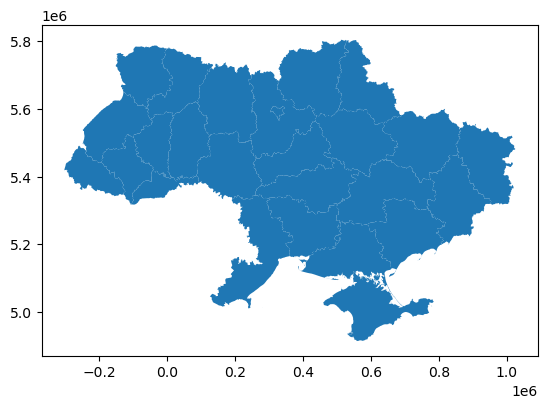

In [6]:
gdf.plot() # приклад візуалізації шейпфайлу зі зміненою системою координат

#### 3.3.3 Використати метод dissolve бібліотеки GeoPandas для знаходження координат меж кордону України у прямокутній системі координат і зберегти у окрему змінну геодатафрейм, до якого була застосована дана операція та перебудувати для нього індексацію

In [7]:
gdf_dissolved = 
bounds = gdf_dissolved.bounds.values[0]

<Axes: >

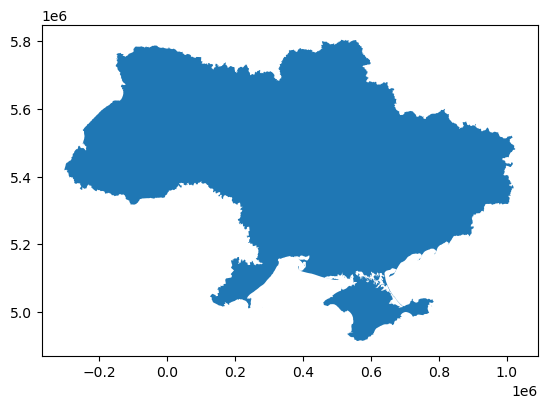

In [8]:
gdf_dissolved.plot() #  приклад візуалізації шейпфайлу, до якого було застосовано метод - dissolve

#### 3.3.4 Потрібно самостійно створити запит до ODC, який використовуватиме для bounds координати в прямокутній системі координат (crs='EPSG:32636') і робитиме перепроекціювання в прямокутну систему координат (output_crs='EPSG:32636'), просторова роздільна здатність = 500 м, cmap='terrain'. Також потрібно самостійно налаштувати розмір dask_chunks та назви їх змінних

In [9]:
query = {'product': ,
         'output_crs' : ,
         'crs': , 
         'resolution': ,
         'lat': , 
         'lon': ,
         'dask_chunks': 
            } 
ds = dc.load(**query)

C:\Users\Home\anaconda3\envs\odc_env\Lib\site-packages\rasterio\warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


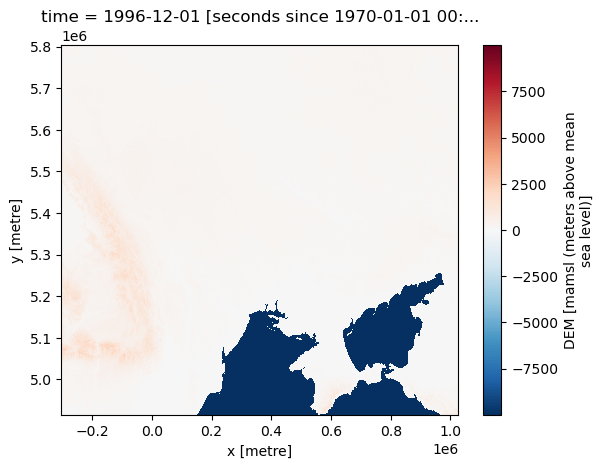

In [10]:
ds.isel(time=0)['DEM'].plot.imshow()

#### 3.3.5 Потрібно замаскувати значення NoData, яке за замовчуванням дорівнює -9999, значеннями np.nan

In [11]:
ds = ds.where(ds != -9999, np.nan)

##### Приклад успішного виконання завдання 3.3.5

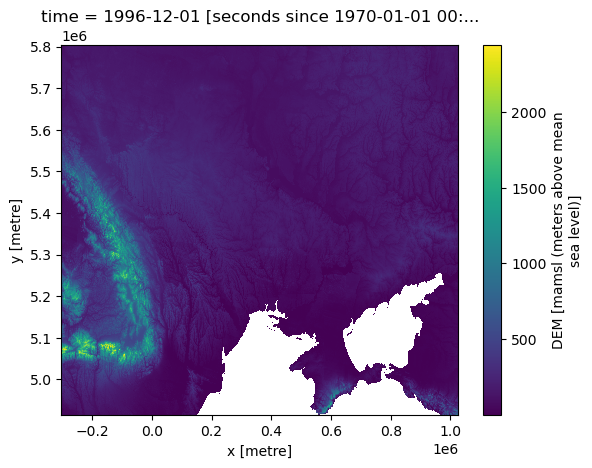

In [12]:
ds.isel(time=0)['DEM'].plot.imshow()

#### 3.3.6 Потрібно взяти маску по території України та відобразити кордони між її областями. Потрібно ознайомитися із методом geometry_mask бібліотеки - rasterio

<Axes: title={'center': 'time = 1996-12-01 [seconds since 1970-01-01 00:...'}, xlabel='x [metre]', ylabel='y [metre]'>

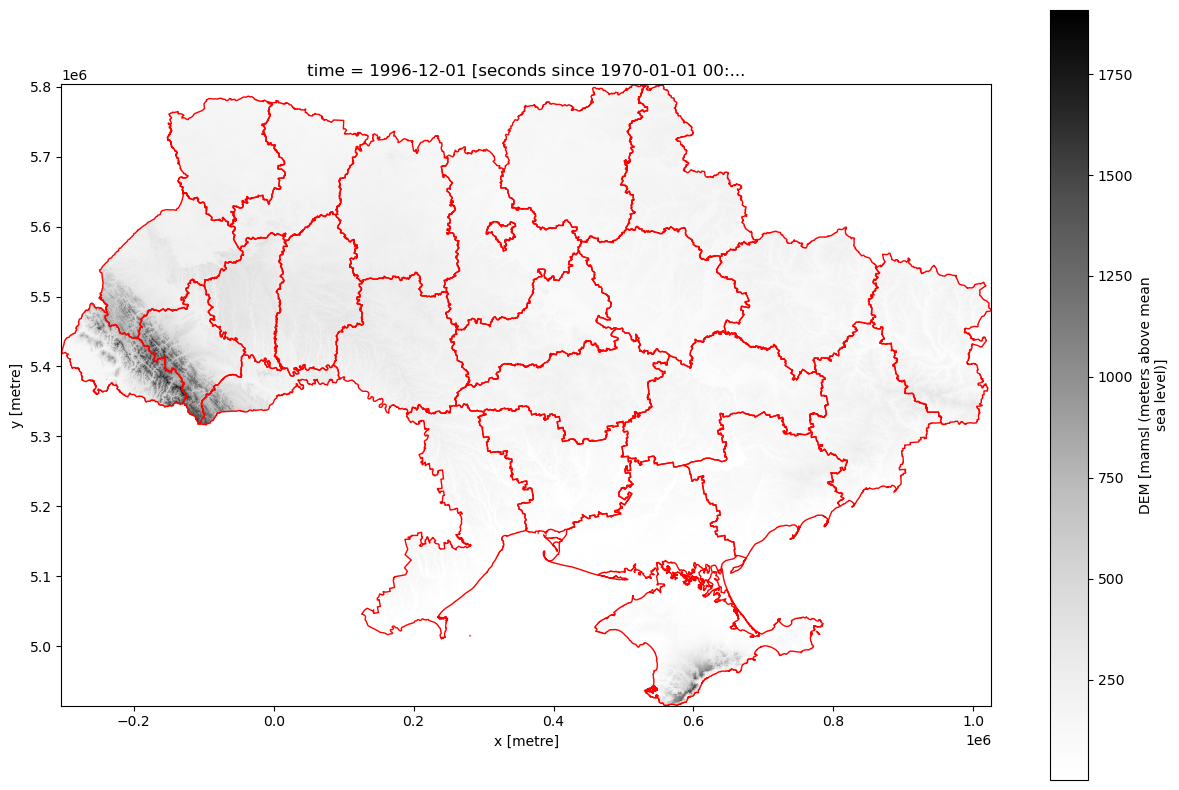

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

crs = geometry.CRS(gdf.crs.to_wkt())
geoms = geometry.Geometry(gdf['geometry'].values[0], crs=crs)
mask = geometry_mask() #TODO - створити bool маску, використавши модуль - geometry_mask 

ds =  #TODO - взяти маску для датасету ds використовуючи згенеровану маску

ds.isel(time=0)['DEM'].plot.imshow() #TODO - візуалізувати датасет, використавши colormap='terrain'
gdf.plot() #TODO - візуалізувати кордони між областями, використавши метод plot бібліотеки geopandas
